### Making imports 

In [40]:
import networkx as nx
import numpy as np
import pandas as pd
import operator
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import colorsys
import queue
import community as community_louvain
import matplotlib.cm as cm

### Uploading and Preprocessing Data

In [4]:
explore_data = pd.read_json("events-participants-as-array.json")

In [5]:
explore_data.shape

(4892, 14)

In [44]:
type(explore_data)

pandas.core.frame.DataFrame

In [6]:
explore_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,34,32.0,30.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34,32.0,25.0,21.0,17.0,15.0,10.0,9.0,8.0,7.0,6.0,NaN,NaN,NaN
2,34,32.0,30.0,29.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26,24.0,21.0,17.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26,20.0,14.0,11.0,8.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
with open('events-participants-as-array.json') as json_file:
    graph_data = json.load(json_file)

In [8]:
type(graph_data)

list

In [9]:
print(len(graph_data))
print(graph_data[:2])

4892
[['34', '32', '30', '26'], ['34', '32', '25', '21', '17', '15', '10', '9', '8', '7', '6']]


### Creating Unique Nodes

In [10]:
uniq_nodes = {x for l in graph_data for x in l}

In [11]:
print(len(uniq_nodes))
print(type(uniq_nodes))

70
<class 'set'>


In [12]:
#checking with an alternative code
res=()
for item in graph_data:
    res = list(set(res) | set(item))
print(len(res))

70


In [13]:
#converting set into a list
uniq_nodes_2 = list(uniq_nodes)

In [14]:
print(len(uniq_nodes_2))
print(type(uniq_nodes_2))

70
<class 'list'>


In [15]:
uniq_nodes_2[:10]

['42', '46', '45', '71', '1', '48', '62', '7', '18', '8']

In [22]:
graph_data2 = [['4594575', '9649581', '3313879', '6138079', '6524595', '6670222'], ['4594575', '6455997', '9582575', '6138079', '9649581']]

In [17]:
len(graph_data2)

2

In [18]:
#creating edges on a smaller data set
edge = [[i[0],j] for i in graph_data2 for j in i[1:]]
edge

[['4594575', '9649581'],
 ['4594575', '3313879'],
 ['4594575', '6138079'],
 ['4594575', '6524595'],
 ['4594575', '6670222'],
 ['4594575', '6455997'],
 ['4594575', '9582575'],
 ['4594575', '6138079'],
 ['4594575', '9649581']]

In [19]:
#creating edges from a list of meetings 
graph_data3 = graph_data2[0]
graph_data3

['4594575', '9649581', '3313879', '6138079', '6524595', '6670222']

In [20]:
edges_graph_data3 = [(graph_data3[i],graph_data3[j]) for i in range(len(graph_data3)) for j in range(i+1, len(graph_data3))]

In [21]:
print(edges_graph_data3)
print(type(edges_graph_data3))
print(len(edges_graph_data3))

[('4594575', '9649581'), ('4594575', '3313879'), ('4594575', '6138079'), ('4594575', '6524595'), ('4594575', '6670222'), ('9649581', '3313879'), ('9649581', '6138079'), ('9649581', '6524595'), ('9649581', '6670222'), ('3313879', '6138079'), ('3313879', '6524595'), ('3313879', '6670222'), ('6138079', '6524595'), ('6138079', '6670222'), ('6524595', '6670222')]
<class 'list'>
15


In [23]:
#rechecking the code above 
edges = []
for i in range(len(graph_data3)):
    for j in range(i+1, len(graph_data3)):
        edges.append((graph_data3[i],graph_data3[j])) 

In [24]:
print(edges)
print(type(edges))
print(len(edges))

[('4594575', '9649581'), ('4594575', '3313879'), ('4594575', '6138079'), ('4594575', '6524595'), ('4594575', '6670222'), ('9649581', '3313879'), ('9649581', '6138079'), ('9649581', '6524595'), ('9649581', '6670222'), ('3313879', '6138079'), ('3313879', '6524595'), ('3313879', '6670222'), ('6138079', '6524595'), ('6138079', '6670222'), ('6524595', '6670222')]
<class 'list'>
15


In [25]:
edges_graph_data2 = []
edges_graph_final = []
for item in graph_data2:
    for i in range(len(item)):
        for j in range(i+1, len(item)):
            edges_graph_data2.append((item[i],item[j]))
    edges_graph_final.append(edges_graph_data2)
    edges_graph_data2 = []
print(len(edges_graph_final[1]))
print(edges_graph_final)

10
[[('4594575', '9649581'), ('4594575', '3313879'), ('4594575', '6138079'), ('4594575', '6524595'), ('4594575', '6670222'), ('9649581', '3313879'), ('9649581', '6138079'), ('9649581', '6524595'), ('9649581', '6670222'), ('3313879', '6138079'), ('3313879', '6524595'), ('3313879', '6670222'), ('6138079', '6524595'), ('6138079', '6670222'), ('6524595', '6670222')], [('4594575', '6455997'), ('4594575', '9582575'), ('4594575', '6138079'), ('4594575', '9649581'), ('6455997', '9582575'), ('6455997', '6138079'), ('6455997', '9649581'), ('9582575', '6138079'), ('9582575', '9649581'), ('6138079', '9649581')]]


### Creating Edges from an Actual Data

In [25]:
#trying on 30% from an actual set
edges_nested = []
for lst in graph_data[:6750]:
    for i in range(len(lst)):
        for j in range(i+1, len(lst)):
            edges_nested.append((lst[i],lst[j])) 

In [26]:
print(edges_nested[:10])
print(type(edges_nested))
print(len(edges_nested))

[('34', '32'), ('34', '30'), ('34', '26'), ('32', '30'), ('32', '26'), ('30', '26'), ('34', '32'), ('34', '25'), ('34', '21'), ('34', '17')]
<class 'list'>
1533


In [27]:
#trying on 50% from an actual set
edges_nested_half = []
for lst in graph_data[:11252]:
    for i in range(len(lst)):
        for j in range(i+1, len(lst)):
            edges_nested_half.append((lst[i],lst[j])) 

In [28]:
print(edges_nested_half[:10])
print(type(edges_nested_half))
print(len(edges_nested_half))

[('34', '32'), ('34', '30'), ('34', '26'), ('32', '30'), ('32', '26'), ('30', '26'), ('34', '32'), ('34', '25'), ('34', '21'), ('34', '17')]
<class 'list'>
1533


In [29]:
#full dataset
graph_edges_nested = []
for lst in graph_data:
    for i in range(len(lst)):
        for j in range(i+1, len(lst)):
            graph_edges_nested.append((lst[i],lst[j])) 

In [30]:
print(graph_edges_nested[:10])
print(type(graph_edges_nested))
print(len(graph_edges_nested))

[('34', '32'), ('34', '30'), ('34', '26'), ('32', '30'), ('32', '26'), ('30', '26'), ('34', '32'), ('34', '25'), ('34', '21'), ('34', '17')]
<class 'list'>
1533


### Creating Edges per List (meeting)

In [31]:
graph_edges_full = []
graph_edges_partial = []
for item in graph_data:
    for i in range(len(item)):
        for j in range(i+1, len(item)):
            graph_edges_partial.append((item[i],item[j]))
    graph_edges_full.append(graph_edges_partial)
    graph_edges_partial = []
print(len(graph_edges_full))
#print(graph_edges_full)

4892


In [32]:
graph_edges_full[:3]

[[('34', '32'),
  ('34', '30'),
  ('34', '26'),
  ('32', '30'),
  ('32', '26'),
  ('30', '26')],
 [('34', '32'),
  ('34', '25'),
  ('34', '21'),
  ('34', '17'),
  ('34', '15'),
  ('34', '10'),
  ('34', '9'),
  ('34', '8'),
  ('34', '7'),
  ('34', '6'),
  ('32', '25'),
  ('32', '21'),
  ('32', '17'),
  ('32', '15'),
  ('32', '10'),
  ('32', '9'),
  ('32', '8'),
  ('32', '7'),
  ('32', '6'),
  ('25', '21'),
  ('25', '17'),
  ('25', '15'),
  ('25', '10'),
  ('25', '9'),
  ('25', '8'),
  ('25', '7'),
  ('25', '6'),
  ('21', '17'),
  ('21', '15'),
  ('21', '10'),
  ('21', '9'),
  ('21', '8'),
  ('21', '7'),
  ('21', '6'),
  ('17', '15'),
  ('17', '10'),
  ('17', '9'),
  ('17', '8'),
  ('17', '7'),
  ('17', '6'),
  ('15', '10'),
  ('15', '9'),
  ('15', '8'),
  ('15', '7'),
  ('15', '6'),
  ('10', '9'),
  ('10', '8'),
  ('10', '7'),
  ('10', '6'),
  ('9', '8'),
  ('9', '7'),
  ('9', '6'),
  ('8', '7'),
  ('8', '6'),
  ('7', '6')],
 [('34', '32'),
  ('34', '30'),
  ('34', '29'),
  ('34', '24')

### Counting Edge Weights 

For each meeting
  get all pairs of participants
  if pair is in G.edges:
    increase edge weight by 1
  else
    add edge to graph

In [34]:
G = nx.Graph()

In [35]:
for lst in graph_edges_full:
    for e1, e2 in lst:
        if G.has_edge(e1,e2) :
            G[e1][e2]['weight'] += 1
        else :
            G.add_edge(e1,e2,weight=1)

In [36]:
G.size()

635

In [37]:
G.edges(data=True)

EdgeDataView([('34', '32', {'weight': 7}), ('34', '30', {'weight': 5}), ('34', '26', {'weight': 1}), ('34', '25', {'weight': 3}), ('34', '21', {'weight': 1}), ('34', '17', {'weight': 1}), ('34', '15', {'weight': 2}), ('34', '10', {'weight': 2}), ('34', '9', {'weight': 1}), ('34', '8', {'weight': 3}), ('34', '7', {'weight': 3}), ('34', '6', {'weight': 3}), ('34', '29', {'weight': 5}), ('34', '24', {'weight': 2}), ('34', '19', {'weight': 4}), ('34', '11', {'weight': 1}), ('34', '54', {'weight': 1}), ('34', '47', {'weight': 1}), ('34', '39', {'weight': 1}), ('34', '36', {'weight': 3}), ('34', '33', {'weight': 3}), ('34', '27', {'weight': 2}), ('34', '28', {'weight': 3}), ('34', '23', {'weight': 2}), ('34', '3', {'weight': 3}), ('34', '1', {'weight': 3}), ('34', '46', {'weight': 1}), ('34', '40', {'weight': 1}), ('34', '37', {'weight': 1}), ('34', '20', {'weight': 2}), ('34', '16', {'weight': 3}), ('34', '12', {'weight': 1}), ('34', '14', {'weight': 1}), ('34', '4', {'weight': 1}), ('32', 

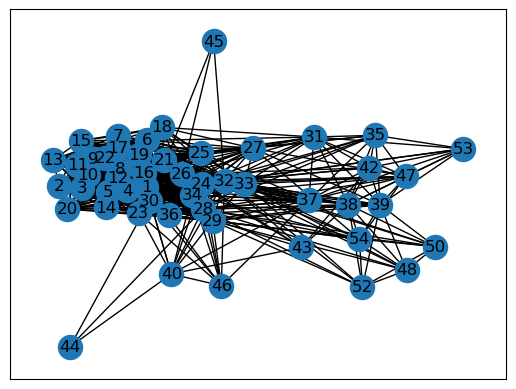

In [38]:
start_pos = nx.spring_layout(G, seed = 100)
nx.draw_networkx(G, pos=start_pos)

### Removing Two Small Groups from a Graph

In [43]:
graphs = list(nx.connected_component_subgraphs(G))

AttributeError: module networkx has no attribute connected_component_subgraphs

In [41]:
graphs

In [42]:
for i, sg in enumerate(graphs):
    print('subgraph {} has {} nodes'.format(i, sg.number_of_nodes()))
    #print('\tNodes:', sg.nodes(data=True))
    #print('\tEdges:', sg.edges())

subgraph 0 has 738 nodes
subgraph 1 has 6 nodes
subgraph 2 has 2 nodes


In [42]:
G_sub=list(nx.connected_component_subgraphs(G))[0]

AttributeError: module networkx has no attribute connected_component_subgraphs

In [44]:
G_sub

In [45]:
G_sub.size()

19935

In [46]:
len(G_sub.edges)

19935

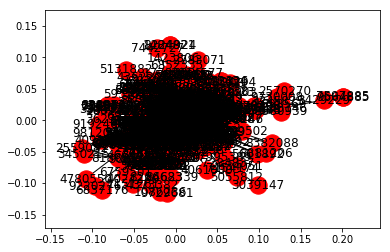

In [47]:
nx.draw_networkx(G_sub, pos=start_pos)

### Community Detection

In [39]:
pip install python-louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 4.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9388 sha256=e241d1e7504c38fe49115ed370e6662d69de1ab68848cd695dc9be1382c6ef25
  Stored in directory: /Users/naidamuslimova/Library/Caches/pip/wheels/4d/7c/b6/79b198e4ec43f915fbdf967953d48b89a18893b12aa9df0ae2
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


In [41]:
#first compute the best partition
partition = community_louvain.best_partition(G_sub)

# compute the best partition
#partition = community_louvain.best_partition(G_sub)

# draw the graph
pos = nx.spring_layout(G_sub)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_sub, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_sub, pos, alpha=0.5)
plt.show()


NameError: name 'G_sub' is not defined

In [51]:
partition

{'4594575': 0,
 '9649581': 0,
 '3313879': 0,
 '6138079': 0,
 '6524595': 0,
 '6670222': 0,
 '6455997': 0,
 '9582575': 0,
 '4550719': 0,
 '1441624': 0,
 '6608661': 0,
 '6159135': 0,
 '7690572': 0,
 '9087840': 0,
 '3803338': 0,
 '9972486': 0,
 '7067231': 0,
 '1003825': 0,
 '6493517': 0,
 '8503467': 0,
 '1865518': 0,
 '5858806': 0,
 '8546110': 0,
 '2399690': 0,
 '8139386': 0,
 '5163413': 0,
 '1112599': 0,
 '5577398': 0,
 '1146339': 0,
 '7423418': 0,
 '3202604': 1,
 '3866212': 2,
 '3267643': 0,
 '4253784': 3,
 '6218893': 0,
 '2998859': 0,
 '2032624': 3,
 '1673698': 3,
 '9404446': 3,
 '1106391': 4,
 '5847548': 3,
 '9959855': 4,
 '4320578': 3,
 '7871043': 5,
 '8317303': 3,
 '3069838': 4,
 '6020177': 6,
 '3216939': 4,
 '3577122': 3,
 '5387658': 0,
 '4589257': 3,
 '9050924': 3,
 '2551809': 0,
 '3932931': 0,
 '7793788': 0,
 '3667194': 0,
 '5125270': 1,
 '2726935': 0,
 '8442295': 3,
 '7903662': 4,
 '1481164': 4,
 '6281912': 3,
 '8348725': 0,
 '2301132': 0,
 '9078686': 0,
 '9457825': 6,
 '5247021'

In [52]:
res = defaultdict(list)
type(res)

collections.defaultdict

In [53]:
sort_communities = {}
for i, v in partition.items():
    sort_communities[v] = [i] if v not in sort_communities.keys() else sort_communities[v] + [i]

In [54]:
print(len(sort_communities[0]))
print(len(sort_communities[1]))
print(len(sort_communities[2]))
print(len(sort_communities[3]))
print(len(sort_communities[4]))
print(len(sort_communities[5]))
print(len(sort_communities[6]))
print(len(sort_communities[7]))
print(len(sort_communities[8]))
print(len(sort_communities[9]))
print(len(sort_communities[10]))

134
117
25
86
152
36
109
3
16
16
44


In [55]:
#sort_communities[0]

### Network Centrality. Identifying "Community Cores" and "Bridges"

#### Degree Centrality

In [56]:
#Degree Centrality. This is based on the assumption that important nodes have many connections.
deg_centrality = nx.degree_centrality(G_sub)
print(deg_centrality)

{'4594575': 0.1587516960651289, '9649581': 0.12075983717774762, '3313879': 0.010854816824966078, '6138079': 0.059701492537313425, '6524595': 0.020352781546811395, '6670222': 0.018995929443690635, '6455997': 0.07191316146540026, '9582575': 0.13297150610583444, '4550719': 0.11940298507462685, '1441624': 0.11668928086838534, '6608661': 0.11940298507462685, '6159135': 0.23066485753052915, '7690572': 0.14654002713704206, '9087840': 0.12211668928086837, '3803338': 0.12890094979647218, '9972486': 0.12890094979647218, '7067231': 0.07055630936227951, '1003825': 0.12890094979647218, '6493517': 0.13297150610583444, '8503467': 0.11397557666214382, '1865518': 0.1655359565807327, '5858806': 0.11668928086838534, '8546110': 0.10990502035278153, '2399690': 0.12890094979647218, '8139386': 0.10990502035278153, '5163413': 0.03934871099050203, '1112599': 0.11668928086838534, '5577398': 0.11397557666214382, '1146339': 0.12347354138398914, '7423418': 0.11397557666214382, '3202604': 0.05020352781546811, '3866

In [57]:
deg_centrality_sort = sorted(deg_centrality.items(), key=lambda x:x[1], reverse=True)
deg_centrality_sort[:10]

[('1442662', 0.4789687924016282),
 ('9208595', 0.4219810040705563),
 ('9909304', 0.39077340569877883),
 ('8480716', 0.3541383989145183),
 ('1165624', 0.31478968792401624),
 ('5316813', 0.28765264586160105),
 ('6355372', 0.28493894165535955),
 ('9959855', 0.2727272727272727),
 ('1682770', 0.24423337856173674),
 ('5766515', 0.24016282225237448)]

In [1]:
##PageRank
[('8183412', 0.0037117992580279935),
 ('9208595', 0.0034612123524907683),
 ('8314913', 0.0034459684781194327),
 ('7391163', 0.003330415134807757),
 ('9959855', 0.003272083894669367),
 ('3866212', 0.0032098939213521327),
 ('8072660', 0.0032004134677617027),
 ('6676235', 0.003130295754521763),
 ('6159135', 0.0030307198713720156),
 ('1682770', 0.0029901604429693183)]

[('8183412', 0.0037117992580279935),
 ('9208595', 0.0034612123524907683),
 ('8314913', 0.0034459684781194327),
 ('7391163', 0.003330415134807757),
 ('9959855', 0.003272083894669367),
 ('3866212', 0.0032098939213521327),
 ('8072660', 0.0032004134677617027),
 ('6676235', 0.003130295754521763),
 ('6159135', 0.0030307198713720156),
 ('1682770', 0.0029901604429693183)]

In [58]:
type(sort_communities[0])

list

#### PageRank

In [59]:
page_rank = nx.pagerank(G_sub,0.4)
page_rank

{'4594575': 0.0019938245870157,
 '9649581': 0.0018131785839178363,
 '3313879': 0.0009449476675566325,
 '6138079': 0.001214301525169034,
 '6524595': 0.001219695948422485,
 '6670222': 0.0012121212094753243,
 '6455997': 0.0014766921985122864,
 '9582575': 0.0017516952908883845,
 '4550719': 0.0013628928262915678,
 '1441624': 0.0016936629918101415,
 '6608661': 0.001583418757763127,
 '6159135': 0.0030307198713720156,
 '7690572': 0.0014547801825333308,
 '9087840': 0.0012442391892952187,
 '3803338': 0.0018135071423925253,
 '9972486': 0.00140306193446301,
 '7067231': 0.0010854693160786924,
 '1003825': 0.0016062967765741287,
 '6493517': 0.0019685575249709622,
 '8503467': 0.0016592746745062255,
 '1865518': 0.0015408246895944758,
 '5858806': 0.001705517249854649,
 '8546110': 0.0014249909876092512,
 '2399690': 0.0016801940592229955,
 '8139386': 0.0014235397783395462,
 '5163413': 0.0010464381447809238,
 '1112599': 0.0015124537925423013,
 '5577398': 0.0015907386299426121,
 '1146339': 0.001681263944597

In [60]:
#sorted PageRank - top 10
page_rank_sort = sorted(page_rank.items(), key=lambda x:x[1], reverse=True)
page_rank_sort[:10]

[('8183412', 0.0037117992580279935),
 ('9208595', 0.0034612123524907683),
 ('8314913', 0.0034459684781194327),
 ('7391163', 0.003330415134807757),
 ('9959855', 0.003272083894669367),
 ('3866212', 0.0032098939213521327),
 ('8072660', 0.0032004134677617027),
 ('6676235', 0.003130295754521763),
 ('6159135', 0.0030307198713720156),
 ('1682770', 0.0029901604429693183)]

In [61]:
#less important
page_rank_sort_less = sorted(page_rank.items(), key=lambda x:x[1])
page_rank_sort_less[:10]

[('4780550', 0.0008136853924754408),
 ('2570270', 0.0008139259684053472),
 ('3039147', 0.0008144252274853217),
 ('4024280', 0.0008144394706067277),
 ('5131882', 0.0008144448980189683),
 ('2783071', 0.000814978703079925),
 ('8286683', 0.0008152199764224991),
 ('2070408', 0.0008156493114834488),
 ('5601892', 0.0008157118569104828),
 ('8881206', 0.0008159956554481448)]

#### Closeness Centrality

In [62]:
#Closeness Centrality : This is based on the assumption that important nodes are close to other nodes.
close_centrality = nx.closeness_centrality(G_sub)
print(close_centrality)

{'4594575': 0.5, '9649581': 0.4776409591704472, '3313879': 0.3451990632318501, '6138079': 0.44829683698296835, '6524595': 0.3501187648456057, '6670222': 0.3499525166191833, '6455997': 0.4274941995359629, '9582575': 0.48423127463863336, '4550719': 0.4776409591704472, '1441624': 0.4745653573728268, '6608661': 0.47919375812743825, '6159135': 0.5298346513299784, '7690572': 0.49663072776280326, '9087840': 0.48013029315960915, '3803338': 0.4936369725385131, '9972486': 0.48327868852459016, '7067231': 0.44966442953020136, '1003825': 0.48423127463863336, '6493517': 0.48905109489051096, '8503467': 0.47425997425997424, '1865518': 0.4936369725385131, '5858806': 0.4745653573728268, '8546110': 0.4724358974358974, '2399690': 0.4798177083333333, '8139386': 0.4724358974358974, '5163413': 0.3779487179487179, '1112599': 0.4745653573728268, '5577398': 0.4736503856041131, '1146339': 0.4785714285714286, '7423418': 0.4736503856041131, '3202604': 0.4355791962174941, '3866212': 0.5253029223093372, '3267643': 0

In [63]:
close_centrality_sort = sorted(close_centrality.items(), key=lambda x:x[1], reverse=True)
close_centrality_sort[:10]

[('1442662', 0.6464912280701754),
 ('9208595', 0.6219409282700422),
 ('9909304', 0.6075845012366035),
 ('8480716', 0.591018444266239),
 ('1165624', 0.5766823161189358),
 ('5316813', 0.5660522273425499),
 ('6355372', 0.5660522273425499),
 ('2446753', 0.5479553903345725),
 ('3203462', 0.5395314787701317),
 ('9959855', 0.5391367959034382)]

#### Betweenness Centrality

In [64]:
#Betweenness Centrality: It assumes that important nodes connect other nodes.
bet_centrality = nx.betweenness_centrality(G_sub, normalized = True, 
                                              endpoints = False)
print(bet_centrality)

{'4594575': 0.004126751925457062, '9649581': 0.0016674039903506867, '3313879': 0.0, '6138079': 0.000832180828395297, '6524595': 1.8951827141203775e-05, '6670222': 1.5947924683829054e-05, '6455997': 0.002672567430733187, '9582575': 0.002325539334202359, '4550719': 0.0005820802801097377, '1441624': 0.00129111520276552, '6608661': 0.0008892669571426078, '6159135': 0.013835227771744792, '7690572': 0.0036113536952805227, '9087840': 0.0008917810928677603, '3803338': 0.002089974352522594, '9972486': 0.0012830775410125463, '7067231': 0.0004743166528790723, '1003825': 0.002260450565759271, '6493517': 0.005939584361196965, '8503467': 0.0005441809204193607, '1865518': 0.004487429127536392, '5858806': 0.00129111520276552, '8546110': 0.00021809890527413293, '2399690': 0.0015595320756976153, '8139386': 0.00021809890527413293, '5163413': 4.525907517410776e-06, '1112599': 0.0005992201556313817, '5577398': 0.0004908811047945548, '1146339': 0.0012650114754578256, '7423418': 0.0004908811047945548, '32026

In [65]:
bet_centrality_sort = sorted(bet_centrality.items(), key=lambda x:x[1], reverse=True)
bet_centrality_sort[:10]

[('9208595', 0.09583329453420684),
 ('1442662', 0.0675156981132638),
 ('8183412', 0.03372926067425677),
 ('6355372', 0.032902476696140805),
 ('8480716', 0.03277587141448449),
 ('9909304', 0.03211652460695476),
 ('8072660', 0.029491965199991102),
 ('1165624', 0.027497099980471288),
 ('9959855', 0.02743594528702309),
 ('5137910', 0.025915199613469924)]

In [ ]:
###

In [66]:
degrees = sorted(G_sub.degree, key=lambda x: x[1], reverse=True)

(-0.9182608872652054,
 1.015493169426918,
 -1.0806127876043319,
 0.6928685396909714)

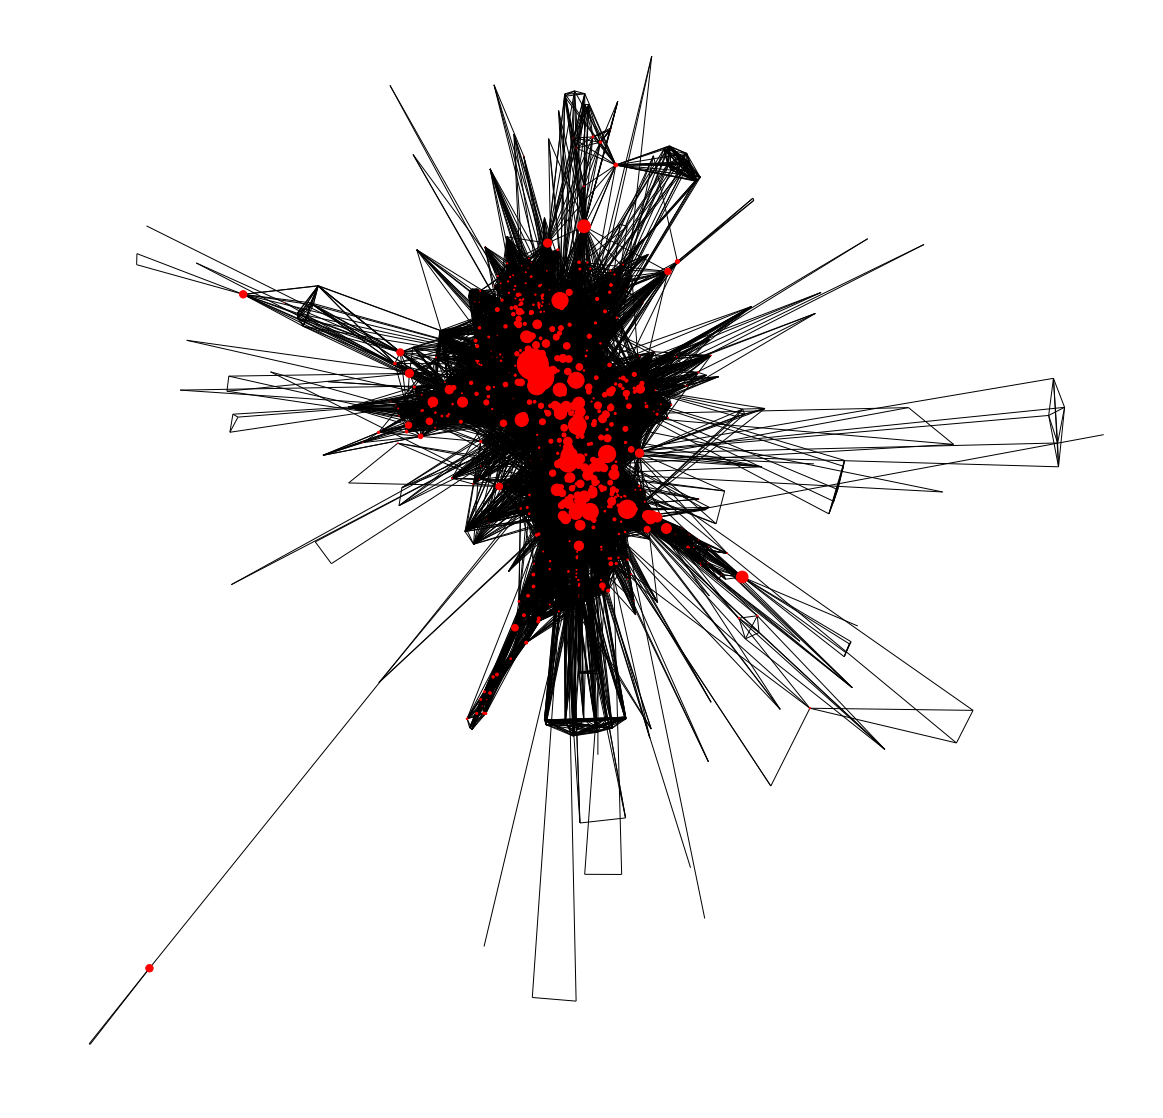

In [68]:
node_size =  [v * 10000 for v in bet_centrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_sub, pos=pos, with_labels=False,
                 node_size=node_size )
plt.axis('off')

In [72]:
#Eigenvector Centrality
eigen_centr = nx.eigenvector_centrality(G_sub)
eigen_centr_sort = sorted(eigen_centr.items(), key=lambda x:x[1], reverse=True)
eigen_centr_sort[:10]

[('1442662', 0.1611762476611693),
 ('9909304', 0.14924078699932244),
 ('9208595', 0.13143364672662905),
 ('8480716', 0.12912185909551527),
 ('1165624', 0.11150892151370052),
 ('5316813', 0.10578665457189033),
 ('6355372', 0.09106775816039248),
 ('1682770', 0.08950009833421202),
 ('9977818', 0.08867608961635928),
 ('5947540', 0.08656153200234548)]

### Shapely Betweeness

In [73]:
#code borrowed from
#https://medium.com/analytics-vidhya/who-is-the-most-important-person-in-a-social-network-dfcfbb9c3f36 
def ShapelyBetweeness(G):
    #Distance between nodes
    d = np.zeros((G.number_of_nodes(), G.number_of_nodes()))
    #list of predecessors on all node pairs
    Pred_s = [[] for i in range(G.number_of_nodes()) ]
    #Length of shortest path on each pair
    sigma = np.zeros((G.number_of_nodes(), G.number_of_nodes()))
    #One-side dependency of source node on target node
    delta = np.zeros((G.number_of_nodes(), G.number_of_nodes()))
    cSh = np.zeros(G.number_of_nodes()) 
    #Sructs
    Q = queue.Queue()
    S = []
    #Create node list
    nodes = []
    for n in G.nodes.data():
        nodes.append(n[0])
    for s in range(0, G.number_of_nodes()):
        for v in range(0, G.number_of_nodes()):
            Pred_s[v] = []; d[s,v] = float("inf") ;sigma[s,v] = 0
        d[s,s] = 1; sigma[s,s] = 1;  
        Q.put(s)
        while Q.empty() == False:
            v = Q.get()
            S.append(v)
            w = list(G.edges(nodes[v], data=True))
            for i in range(0,len(w)):
                if d[s, nodes.index(w[i][1])] == float("inf"):
                    d[s, nodes.index(w[i][1])] = d[s, v] + 1
                    Q.put(nodes.index(w[i][1]))
                if d[s, nodes.index(w[i][1])] == d[s, v] + 1:
                    sigma[s,nodes.index(w[i][1])] += sigma[s,v]
                    Pred_s[nodes.index(w[i][1])].append(v)

    for v in range(0, G.number_of_nodes()-1):
        delta[s,v] = 0

    while len(S) > 0:
        w = S.pop()
        for v in Pred_s[w]:
            delta[s,v] += (sigma[s,v]/sigma[s,w])*(1/d[s,w] + delta[s,w])
        if w != s:
            cSh[w] += delta[s,w] + (2-d[s,w])/d[s,w]

    for v in range(0, G.number_of_nodes()):
        cSh[v] = cSh[v]/2

    return cSh

In [74]:
Shaply_result = ShapelyBetweeness(G_sub)

In [75]:
type(Shaply_result)

numpy.ndarray

In [76]:
print(Shaply_result)

[ 2.41325571e+04  1.21361423e+04 -2.21400000e+02  5.56200826e+03
 -2.21400000e+02 -2.21400000e+02  1.26247647e+04  1.63369416e+04
  1.93193087e+03  9.71925138e+03 -1.84500000e+02  3.27205609e+07
  1.76660257e+04 -1.84500000e+02  1.96116727e+06 -1.84500000e+02
 -1.84500000e+02  1.47000654e+04  4.86681014e+04 -1.84500000e+02
 -1.84500000e+02  9.71925138e+03 -1.84500000e+02  4.11898759e+03
 -1.84500000e+02 -1.84500000e+02 -1.84500000e+02 -1.84500000e+02
  4.11897180e+03 -1.84500000e+02 -1.84500000e+02  4.80769439e+06
  4.09925661e+04 -1.84500000e+02  8.31084231e+03  8.36935633e+04
 -1.84500000e+02 -1.84500000e+02 -1.84500000e+02  2.08698961e+06
 -1.84500000e+02  6.63866950e+06 -1.84500000e+02  6.11876698e+06
 -1.84500000e+02  2.65848469e+06 -1.84500000e+02  4.14187363e+06
 -1.84500000e+02 -1.84500000e+02 -1.84500000e+02 -1.84500000e+02
  2.94841720e+04  1.73200052e+04 -1.84500000e+02  6.36886975e+07
  9.48931315e+05 -1.84500000e+02 -1.84500000e+02  9.39993461e+06
  5.88400178e+06 -1.84500

In [77]:
#print(ShapelyBetweeness(G_sub))

### Adding Attributes

In [78]:
#G_sub.nodes

In [79]:
nx.set_node_attributes(G_sub, partition, "community")
G_sub.nodes['4594575']["community"]

0

In [80]:
nx.set_node_attributes(G_sub, deg_centrality, "degree")
G_sub.nodes['4594575']["degree"]

0.1587516960651289

In [81]:
nx.set_node_attributes(G_sub, close_centrality, "closeness")
G_sub.nodes['4594575']["closeness"]

0.5

In [82]:
nx.set_node_attributes(G_sub, bet_centrality, "betweenness")
G_sub.nodes['4594575']["betweenness"]

0.004126751925457062

In [83]:
nx.set_node_attributes(G_sub, page_rank, "page_rank")
G_sub.nodes['4594575']["page_rank"]

0.0019938245870157

In [84]:
nx.get_node_attributes(G_sub,"betweenness" )

{'4594575': 0.004126751925457062,
 '9649581': 0.0016674039903506867,
 '3313879': 0.0,
 '6138079': 0.000832180828395297,
 '6524595': 1.8951827141203775e-05,
 '6670222': 1.5947924683829054e-05,
 '6455997': 0.002672567430733187,
 '9582575': 0.002325539334202359,
 '4550719': 0.0005820802801097377,
 '1441624': 0.00129111520276552,
 '6608661': 0.0008892669571426078,
 '6159135': 0.013835227771744792,
 '7690572': 0.0036113536952805227,
 '9087840': 0.0008917810928677603,
 '3803338': 0.002089974352522594,
 '9972486': 0.0012830775410125463,
 '7067231': 0.0004743166528790723,
 '1003825': 0.002260450565759271,
 '6493517': 0.005939584361196965,
 '8503467': 0.0005441809204193607,
 '1865518': 0.004487429127536392,
 '5858806': 0.00129111520276552,
 '8546110': 0.00021809890527413293,
 '2399690': 0.0015595320756976153,
 '8139386': 0.00021809890527413293,
 '5163413': 4.525907517410776e-06,
 '1112599': 0.0005992201556313817,
 '5577398': 0.0004908811047945548,
 '1146339': 0.0012650114754578256,
 '7423418': 

### Plotting 

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

sw0 = nx.watts_strogatz_graph(300,3,0.05)
dcent = nx.degree_centrality(sw0)
dcent_color = [dcent[i] for i in range(len(dcent))]
ecent = nx.degree_centrality(sw0)
bcent = nx.betweenness_centrality(sw0)
ccent = nx.closeness_centrality(sw0)

plt.figure(1)
nx.draw(sw0,pos=None,with_labels=False,node_size=5,node_color=dcent_color,width=0.05)
plt.savefig("sw0.png",dpi=500)


In [119]:
type(deg_centrality)

dict

NameError: name 'labels' is not defined

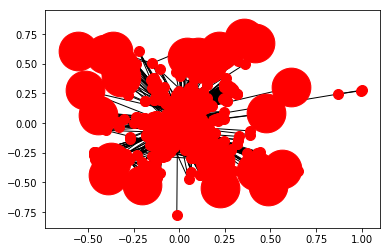

In [117]:
layout = nx.spring_layout(G_sub)
large = []
small = []
d = G.degree(weight='weight')
for node in G_sub:
    if d[node] > 4: 
        large.append(node)
    else:
        small.append(node)
nx.draw_networkx_edges(G_sub, layout)
nx.draw_networkx_nodes(G_sub, layout, nodelist=large, node_size=100)
nx.draw_networkx_nodes(G_sub, layout, nodelist=small, node_size=1500)
nx.draw_networkx_edge_labels(G_sub, layout, edge_labels=labels)
nx.draw_networkx_labels(G_sub, layout, labels=lab_node, font_size=10, font_family='sans-serif')
plt.axis("off")
plt.show()


### Gephi

In [86]:
nx.write_gexf(G_sub, "gephi_updated.gexf")

In [87]:
G_sub_removed = G_sub
G_sub_removed.remove_node('1442662')
G_sub_removed.remove_node('9208595')
G_sub_removed.remove_node('9909304')
G_sub_removed.remove_node('1682770')

In [88]:
nx.write_gexf(G_sub_removed, "gephi_removed.gexf")

In [123]:
G_sub_removed_3 = G_sub_removed
#G_sub_removed_3.remove_node('8480716')
G_sub_removed_3.remove_node('1165624')
G_sub_removed_3.remove_node('6355372')
G_sub_removed_3.remove_node('5316813')

In [124]:
nx.write_gexf(G_sub_removed_3, "gephi_removed_3.gexf")

In [ ]:
#building gephi graph with page rank
#nx.write_gexf(G_sub, "updated_version.gexf")

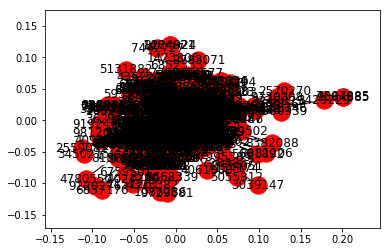

In [128]:
#G = nx.DiGraph(adjacency_matrix)
#start_pos = nx.spring_layout(G_mat, seed = 100)
labels = nx.get_edge_attributes(G_sub_removed_3,'weight')
nx.draw_networkx_edge_labels(G_sub_removed_3,pos=start_pos,edge_labels=labels)
nx.draw_networkx(G_sub_removed_3, pos=start_pos)



### Closeness Centrality for Communities #0, 1, 3, 6

In [89]:
#Closeness Centrality for community #0 (121)
sort_communities_0 = {}
for i in sort_communities[0]:
    if i in close_centrality.keys():
        sort_communities_0[i] = close_centrality[i]

In [90]:
sorted(sort_communities_0.items(), key=lambda x:x[1], reverse=True)[:4]

[('5316813', 0.5660522273425499),
 ('2446753', 0.5479553903345725),
 ('3203462', 0.5395314787701317),
 ('5766515', 0.534833091436865)]

In [91]:
#Closeness Centrality for community #1 (116)
sort_communities_1 = {}
for i in sort_communities[1]:
    if i in close_centrality.keys():
        sort_communities_1[i] = close_centrality[i]
sorted(sort_communities_1.items(), key=lambda x:x[1], reverse=True)[:4]

[('9208595', 0.6219409282700422),
 ('3344258', 0.5313626532083634),
 ('3304037', 0.5253029223093372),
 ('5137910', 0.5153846153846153)]

In [92]:
#Closeness Centrality for community #3 (143) 
sort_communities_3 = {}
for i in sort_communities[3]:
    if i in close_centrality.keys():
        sort_communities_3[i] = close_centrality[i]
sorted(sort_communities_3.items(), key=lambda x:x[1], reverse=True)[:4]

[('8480716', 0.591018444266239),
 ('8788229', 0.5309798270893372),
 ('8962643', 0.5058339052848319),
 ('7609194', 0.4959623149394347)]

In [93]:
#Closeness Centrality for community #6 (108) 
sort_communities_6 = {}
for i in sort_communities[6]:
    if i in close_centrality.keys():
        sort_communities_6[i] = close_centrality[i]
sorted(sort_communities_6.items(), key=lambda x:x[1], reverse=True)[:4]

[('1442662', 0.6464912280701754),
 ('9977818', 0.5268048606147248),
 ('5115594', 0.5186488388458832),
 ('1682770', 0.5186488388458832)]

### Degree Centrality for communities #0, 1, 3, 6 

In [95]:
# Degree Centrality for community #0 (121 members)
deg_cent_communities_0 = {}
for i in sort_communities[0]:
    if i in deg_centrality.keys():
        deg_cent_communities_0[i] = deg_centrality[i] 

In [96]:
#sorted deg_cent_communities_0 - top 4 
sorted(deg_cent_communities_0.items(), key=lambda x:x[1], reverse=True)[:4]

[('5316813', 0.28765264586160105),
 ('5766515', 0.24016282225237448),
 ('6159135', 0.23066485753052915),
 ('2446753', 0.22795115332428764)]

In [97]:
print(deg_centrality['4594575'])
print(deg_centrality.get('4594575'))

0.1587516960651289
0.1587516960651289


In [98]:
# Degree Centrality for community #1 (116 members)
deg_cent_communities_1 = {}
for i in sort_communities[1]:
    if i in deg_centrality.keys():
        deg_cent_communities_1[i] = deg_centrality[i] 
sorted(deg_cent_communities_1.items(), key=lambda x:x[1], reverse=True)[:4]

[('9208595', 0.4219810040705563),
 ('3344258', 0.2021709633649932),
 ('5137910', 0.18995929443690637),
 ('3304037', 0.17639077340569875)]

In [99]:
# Degree Centrality for community #3 (143 members)
deg_cent_communities_3 = {}
for i in sort_communities[3]:
    if i in deg_centrality.keys():
        deg_cent_communities_3[i] = deg_centrality[i] 
sorted(deg_cent_communities_3.items(), key=lambda x:x[1], reverse=True)[:4]

[('8480716', 0.3541383989145183),
 ('8788229', 0.20624151967435547),
 ('8962643', 0.175033921302578),
 ('8276042', 0.14925373134328357)]

In [100]:
# Degree Centrality for community #6 (108 members)
deg_cent_communities_6 = {}
for i in sort_communities[6]:
    if i in deg_centrality.keys():
        deg_cent_communities_6[i] = deg_centrality[i] 
sorted(deg_cent_communities_6.items(), key=lambda x:x[1], reverse=True)[:4]

[('1442662', 0.4789687924016282),
 ('1682770', 0.24423337856173674),
 ('8314913', 0.2320217096336499),
 ('2388443', 0.21981004070556306)]

In [101]:
print(len(deg_cent_communities_6))
print(len(sort_communities[6]))

109
109


### Betweenness Centrality for Communities # 0, 1, 3, 6

In [102]:
# Betweenness Centrality for community #0 (121 members) 
betw_cent_communities_0 = {}
for i in sort_communities[0]:
    if i in bet_centrality.keys():
        betw_cent_communities_0[i] = bet_centrality[i] 

In [103]:
#sorted Betweenness Centrality for community #0 - top 4
sorted(betw_cent_communities_0.items(), key=lambda x:x[1], reverse=True)[:4]

[('5316813', 0.017707043134769382),
 ('2998859', 0.016444816797466923),
 ('6159135', 0.013835227771744792),
 ('5766515', 0.01109765233907014)]

In [104]:
print(bet_centrality['9649581'])
print(bet_centrality.get('9649581'))

0.0016674039903506867
0.0016674039903506867


In [105]:
# Betweenness Centrality for community #1 (116 members) 
betw_cent_communities_1 = {}
for i in sort_communities[1]:
    if i in bet_centrality.keys():
        betw_cent_communities_1[i] = bet_centrality[i]
#sorted Betweenness Centrality for community #1 - top 4
sorted(betw_cent_communities_1.items(), key=lambda x:x[1], reverse=True)[:4]

[('9208595', 0.09583329453420684),
 ('5137910', 0.025915199613469924),
 ('7391163', 0.02565245496132463),
 ('4470779', 0.01625941471559962)]

In [106]:
# Betweenness Centrality for community #3 (143 members) 
betw_cent_communities_3 = {}
for i in sort_communities[3]:
    if i in bet_centrality.keys():
        betw_cent_communities_3[i] = bet_centrality[i]
#sorted Betweenness Centrality for community #3 - top 4
sorted(betw_cent_communities_3.items(), key=lambda x:x[1], reverse=True)[:4]

[('8480716', 0.03277587141448449),
 ('8788229', 0.01747114086905078),
 ('8276042', 0.009926687275704579),
 ('2133568', 0.00930861285565559)]

In [107]:
# Betweenness Centrality for community #6 (108 members) 
betw_cent_communities_6 = {}
for i in sort_communities[6]:
    if i in bet_centrality.keys():
        betw_cent_communities_6[i] = bet_centrality[i]
#sorted Betweenness Centrality for community #6 - top 4
sorted(betw_cent_communities_6.items(), key=lambda x:x[1], reverse=True)[:4]

[('1442662', 0.0675156981132638),
 ('5115594', 0.013192011262494021),
 ('1682770', 0.011869809001815244),
 ('8314913', 0.0076664212819926025)]

## Miscellaneous

### Network Centrality. Identifying "Community Cores" and "Bridges"

In [ ]:
#Closeness Centrality : This is based on the assumption that important nodes are close to other nodes.
close_centrality = nx.closeness_centrality(G_sub)
print(close_centrality)

In [ ]:
close_centrality_sort = sorted(close_centrality.items(), key=lambda x:x[1], reverse=True)
close_centrality_sort[:10]

In [ ]:
#Betweenness Centrality: It assumes that important nodes connect other nodes.
bet_centrality = nx.betweenness_centrality(G_sub, normalized = True, 
                                              endpoints = False)
print(bet_centrality)

In [ ]:
bet_centrality_sort = sorted(bet_centrality.items(), key=lambda x:x[1], reverse=True)
bet_centrality_sort[:10]

In [ ]:
degrees = sorted(G_sub.degree, key=lambda x: x[1], reverse=True)

In [ ]:
degrees

In [ ]:
node_size =  [v * 10000 for v in betweennessCentrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_sub, pos=pos, with_labels=False,
                 node_size=node_size )
plt.axis('off')

In [ ]:
eigen_centr = nx.eigenvector_centrality(G_sub)

### Adding Attributes

In [ ]:
#G_sub.nodes

In [ ]:
nx.set_node_attributes(G_sub, partition, "community")
G_sub.nodes['4594575']["community"]

In [ ]:
nx.set_node_attributes(G_sub, deg_centrality, "degree")
G_sub.nodes['4594575']["degree"]

In [ ]:
nx.set_node_attributes(G_sub, close_centrality, "closeness")

In [ ]:
G_sub.nodes['4594575']["closeness"]

In [ ]:
nx.set_node_attributes(G_sub, bet_centrality, "betweenness")

In [ ]:
G_sub.nodes['4594575']["betweenness"]

In [ ]:
nx.set_node_attributes(G_sub, page_rank, "page_rank")

In [ ]:
G_sub.nodes['4594575']["page_rank"]

In [ ]:
nx.get_node_attributes(G_sub,"betweenness" )

### Gephi

In [ ]:
pip install GraphiPy

In [ ]:
pip install gephistreamer

In [ ]:
from gephistreamer import graph
from gephistreamer import streamer

In [ ]:
nx.write_gexf(G_sub, "test.gexf")

In [ ]:
G_sub.remove_node('1442662')

In [ ]:
G_sub_removed = G_sub

In [ ]:
G_sub_removed.remove_node('9208595')
G_sub_removed.remove_node('9909304')
G_sub_removed.remove_node('1682770')

In [ ]:
len(G_sub_removed.edges)

In [ ]:
G_sub_removed_edges = G_sub_removed

In [ ]:
#Betweenness Centrality for the removed graph
bet_centr_removed = nx.betweenness_centrality(G_sub_removed_edges, normalized = True, 
                                              endpoints = False)

In [ ]:
bet_centr_removed_sort = sorted(bet_centr_removed.items(), key=lambda x:x[1], reverse=True)
bet_centr_removed_sort[:10]

In [ ]:
bet_centrality_sort = sorted(bet_centrality.items(), key=lambda x:x[1], reverse=True)
bet_centrality_sort[:10]

In [ ]:
G_sub_removed.edges

In [ ]:
nx.write_gexf(G_sub_removed, "test_removed.gexf")

In [ ]:
#building gephi graph with page rank
nx.write_gexf(G_sub, "updated_version.gexf")

In [ ]:
dic={}
for i in uniq_nodes_2:
    for j in graph_data:
        if i in j:
            if i in dic:
                dic[i].extend(j)
            else:
                dic[i]=j           